In [1]:
import os

In [2]:
cwd = os.getcwd()
results_fodler_name = os.path.join(cwd, "A_results")
print(os.path.exists(results_fodler_name))

True


In [3]:
import numpy as np

In [4]:
enc_states = np.load(os.path.join(results_fodler_name, "enc_states.npy"))
main_states = np.load(os.path.join(results_fodler_name, "main_states.npy"))

In [5]:
from utils.inputs import generate_piecewise_constant_signal

In [6]:
seed = 1
dt = 0.1
step_duration = 20.    
scale = 1. 
num_steps = 1_000

In [7]:
# generation of the stimulus
sig, times, inp_times, inp_amplitudes = generate_piecewise_constant_signal(
    seed=seed, 
    num_steps=num_steps,
    step_duration=step_duration, 
    resolution=dt, 
    scale=scale
    )
sig = sig[1:] / 2

In [8]:
print(enc_states.shape, main_states.shape, sig.shape)

(500, 200000) (1000, 200000) (200000,)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x = main_states
z = sig

In [11]:
reg = LinearRegression(n_jobs=-1, fit_intercept=False).fit(x.T, z)
W_out = reg.coef_
z_hat = np.dot(W_out, x)
# print(f"\nElapsed time for capacity computation: {time.time() - t_start}")


covs = np.cov(z_hat, z)[0, 1] ** 2.0
vars = np.var(z) * np.var(z_hat)
capacity = covs / vars

print(capacity)

KeyboardInterrupt: 

In [12]:
capacity_ = 1.0 - (np.mean((z - z_hat) ** 2) / np.var(z))  # TODO - before
print(capacity_)

0.3701816554257824


In [13]:
from utils.capacity import compute_capacity_sequential, compute_capacity

In [14]:
enc_estimate, enc_capacity, enc_error = compute_capacity(enc_states, sig)
main_estimate, main_capacity, main_error = compute_capacity(main_states, sig)

In [15]:
print(enc_estimate.shape)

(200000,)


In [16]:
enc_estimate.shape

(200000,)

In [17]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
enc_states.shape

(500, 200000)

In [44]:
steps = np.arange(0, 200_000, 2_000)[1:]

100%|██████████| 99/99 [03:02<00:00,  1.84s/it]


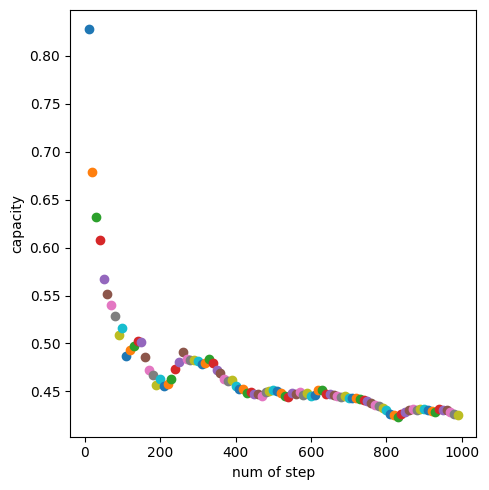

In [45]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5,5)
)

for i in tqdm(steps):
    
    enc_estimate, enc_capacity, enc_error = compute_capacity(enc_states[:,:i], sig[:i])

    ax.scatter(
        i*dt/step_duration,
        enc_capacity
    )

ax.set_xlabel("num of step")
ax.set_ylabel("capacity")
plt.tight_layout()

In [41]:
enc_states[-1].shape[0] * dt / step_duration

1000.0

In [28]:
step_duration

20.0

In [34]:
compute_capacity_sequential(
    time_vector=times,
    signal=sig,
    enc_states=enc_states,
    ex_states=main_states,
    subsampling_factor=1.,
    step_lag=10.,
    max_lag=100.,
    dt=0.1
)

Lag = 0.0 ms
Encoding Layer: 
	- Capacity=0.42475441954783366, MSE=0.04832995673751072
Main Circuit: 
	- Capacity=0.3876814246217489, MSE=0.05291446660918766
Lag = 10.0 ms
Encoding Layer: 
	- Capacity=0.7130477403225735, MSE=0.024097351797583193
Main Circuit: 
	- Capacity=0.716303660381198, MSE=0.02433305005550835
Lag = 20.0 ms
Encoding Layer: 
	- Capacity=0.4917345619594413, MSE=0.042637750405742296
Main Circuit: 
	- Capacity=0.5469646883645338, MSE=0.03801089837471689


KeyboardInterrupt: 

In [21]:
import matplotlib.pyplot as plt

In [30]:
times.shape

(200001,)

In [52]:
times[int(10/dt)]

np.float64(10.0)

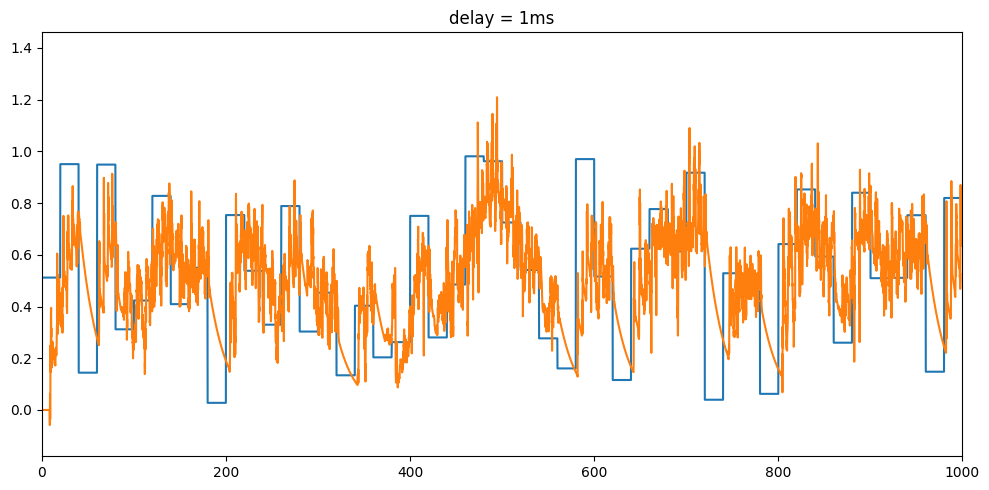

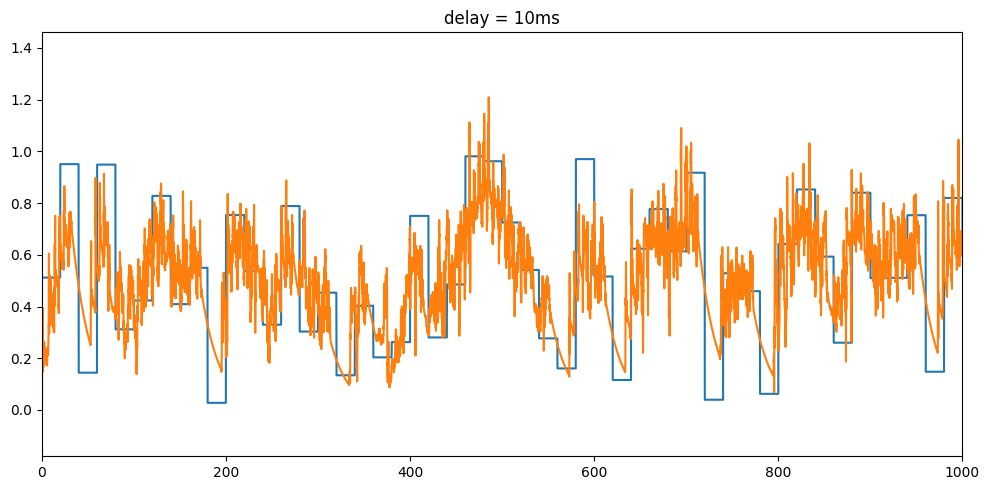

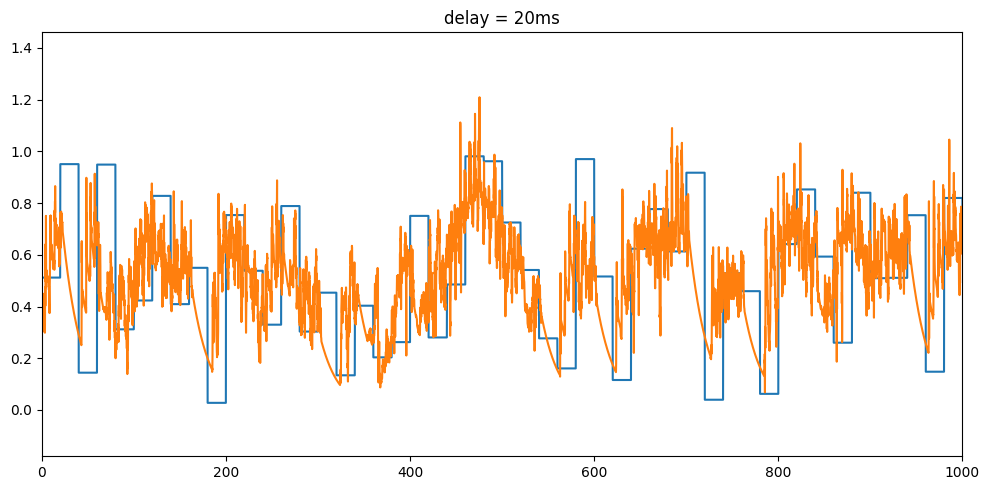

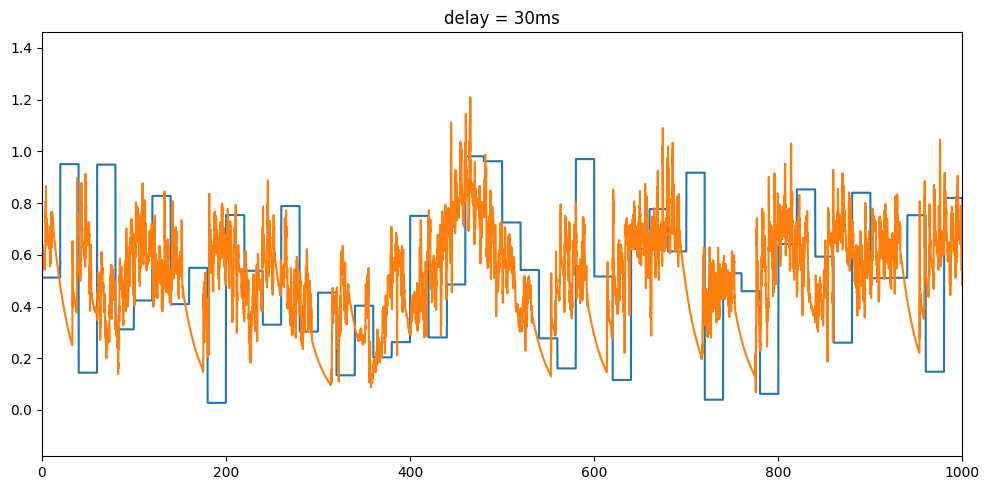

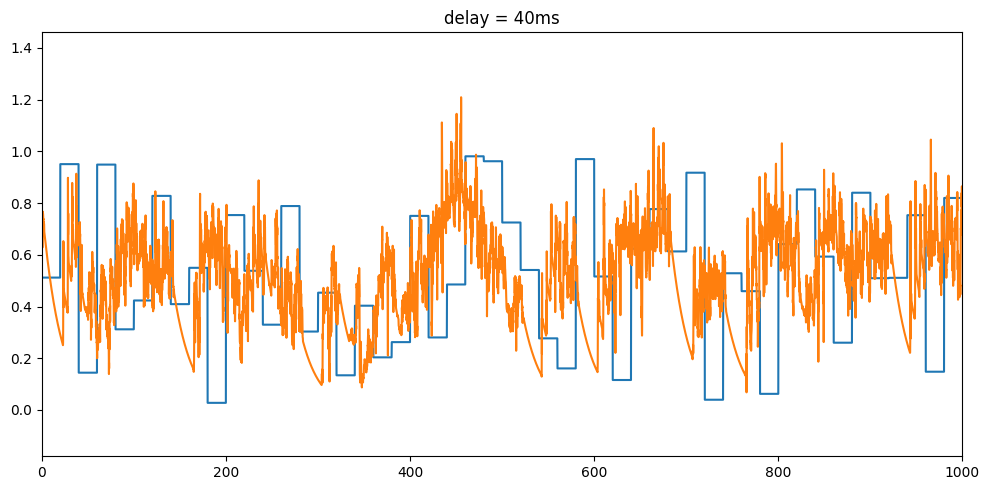

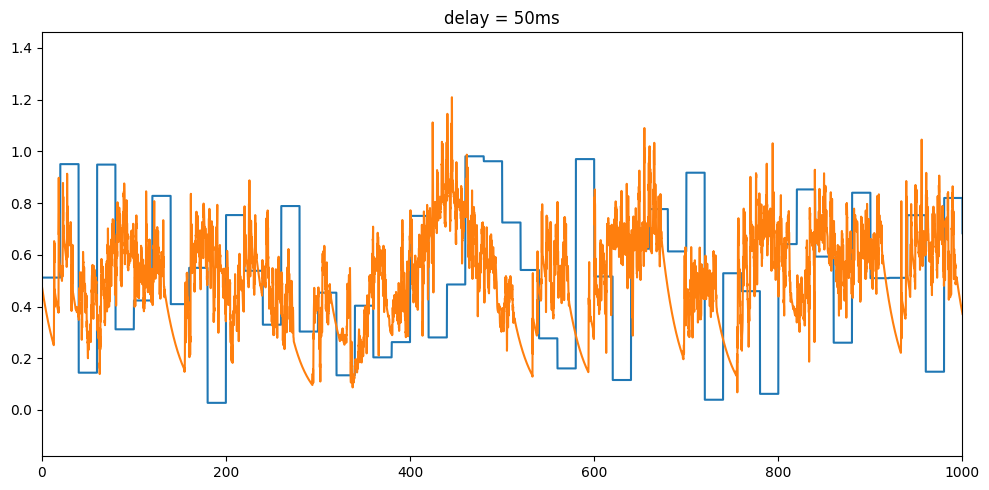

In [55]:
for t_lag in [1, 10, 20,30,40,50]:

    fig,ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(10,5)
    )

    ax.plot(
        times[1:int(-t_lag/dt)],
        sig[:int(-t_lag/dt)]
    )

    ax.plot(
        times[1:int(-t_lag/dt)],
        main_estimate[int(t_lag/dt):]
    )

    ax.set_xlim(0, 1_000)

    ax.set_title(f"delay = {t_lag}ms")
    plt.tight_layout()
    plt.show()